Hyperparameter Grid Search on different Grid Sizes

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import pickle
from envs.gridworld import GridWorld
from agents.policygradient import MaxEntAgent
from utils.visualization import (
    plot_metrics,
    visualize_policy,
    plot_trajectories,
    plot_state_visitation_heatmap,
    plot_rewards,
)

random_seed = 42
torch.manual_seed(random_seed)

def train_and_evaluate(env, lr, temperature, gamma, hidden_dim, num_episodes, max_steps):
    """
    Train the agent with specific hyperparameters and return metrics.
    """
    print(f"Training with lr={lr}, temperature={temperature}, gamma={gamma}, hidden_dim={hidden_dim}...")
    agent = MaxEntAgent(
        state_dim=2,
        action_dim=4,
        hidden_dim=hidden_dim,
        lr=lr,
        temperature=temperature,
        gamma=gamma,
    )
    rewards, losses, entropies = agent.train(env, num_episodes=num_episodes, max_steps=max_steps)
    return rewards, losses, entropies, agent

def perform_grid_search(env, hyperparams, num_episodes, max_steps, random_seed):
    """
    Perform grid search over hyperparameters and return results.
    """
    results = {}
    for lr in hyperparams["learning_rates"]:
        for temperature in hyperparams["temperatures"]:
            for gamma in hyperparams["gammas"]:
                for hidden_dim in hyperparams["hidden_dims"]:
                    torch.manual_seed(random_seed)
                    key = f"lr={lr}, temp={temperature}, gamma={gamma}, hidden_dim={hidden_dim}"
                    rewards, losses, entropies, agent = train_and_evaluate(
                        env,
                        lr=lr,
                        temperature=temperature,
                        gamma=gamma,
                        hidden_dim=hidden_dim,
                        num_episodes=num_episodes,
                        max_steps=max_steps,
                    )
                    results[key] = {
                        "rewards": rewards,
                        "losses": losses,
                        "entropies": entropies,
                        "agent": agent,
                    }
    return results

def save_results(results, filename):
    with open(filename, "wb") as f:
        pickle.dump(results, f)

def load_results(filename):
    with open(filename, "rb") as f:
        return pickle.load(f)

def analyze_results(results):
    data = []
    for key, metrics in results.items():
        avg_reward = np.mean(metrics["rewards"])
        final_reward = metrics["rewards"][-1]
        avg_loss = np.mean(metrics["losses"])
        final_loss = metrics["losses"][-1]
        avg_entropy = np.mean(metrics["entropies"])
        final_entropy = metrics["entropies"][-1]

        data.append({
            "Hyperparameters": key,
            "Final Reward": final_reward,
            "Average Reward": avg_reward,
            "Final Loss": final_loss,
            "Average Loss": avg_loss,
            "Final Entropy": final_entropy,
            "Average Entropy": avg_entropy,
        })

    df = pd.DataFrame(data)
    df_sorted_by_final_reward = df.sort_values(by="Final Reward", ascending=False)
    df_sorted_by_avg_reward = df.sort_values(by="Average Reward", ascending=False)
    return df_sorted_by_final_reward, df_sorted_by_avg_reward

def visualize_best_agent(env, results, df_sorted):
    best_key = df_sorted.iloc[0]["Hyperparameters"]
    best_agent = results[best_key]["agent"]
    best_rewards = results[best_key]["rewards"]
    best_losses = results[best_key]["losses"]
    best_entropies = results[best_key]["entropies"]

    print(f"Best agent: {best_key}")
    plot_metrics(best_rewards, best_losses, best_entropies)
    plot_rewards(best_rewards)
    visualize_policy(env, best_agent)
    plot_trajectories(env, best_agent, num_trajectories=5, max_steps=100)
    plot_state_visitation_heatmap(env, best_agent, max_steps=100)


In [8]:
hyperparams_10x10 = {
    "learning_rates": [0.01, 0.05],
    "temperatures": [0.015, 0.05],
    "gammas": [0.993, 0.995],
    "hidden_dims": [64, 128, 192],
}

hyperparams_14x14 = {
    "learning_rates": [0.01, 0.05],
    "temperatures": [0.015, 0.05],
    "gammas": [0.993, 0.995],
    "hidden_dims": [64, 128, 192],
}

hyperparams_5x5 = {
    "learning_rates": [0.01, 0.05],
    "temperatures": [0.015, 0.05],
    "gammas": [0.993, 0.995],
    "hidden_dims": [64, 128, 192],
}

In [ ]:
# Perform grid search for 10x10 grid
env_10x10 = GridWorld(grid_size=10, stochastic=False, noise=0)
results_10x10 = perform_grid_search(env_10x10, hyperparams_10x10, num_episodes=700, max_steps=120, random_seed=random_seed)
save_results(results_10x10, "grid_search_results_10x10.pickle")


,Hyperparameters,Final Reward,Average Reward,Final Loss,Average Loss,Final Entropy,Average Entropy
13,"lr=0.05, temp=0.015, gamma=0.993, hidden_dim=128",33.0,25.847143,-0.028724,-0.001151,0.711757,0.771824
7,"lr=0.01, temp=0.05, gamma=0.993, hidden_dim=128",33.0,24.034286,0.094129,-0.073311,0.726828,0.846206
1,"lr=0.01, temp=0.015, gamma=0.993, hidden_dim=128",33.0,23.655714,-0.018199,0.002980,0.603372,0.689306
4,"lr=0.01, temp=0.015, gamma=0.995, hidden_dim=128",32.0,27.574286,0.099490,0.034377,0.626029,0.611602
11,"lr=0.01, temp=0.05, gamma=0.995, hidden_dim=192",31.0,14.040000,0.132343,-0.107540,0.910950,0.946101


,Hyperparameters,Final Reward,Average Reward,Final Loss,Average Loss,Final Entropy,Average Entropy
4,"lr=0.01, temp=0.015, gamma=0.995, hidden_dim=128",32.0,27.574286,0.099490,0.034377,0.626029,0.611602
13,"lr=0.05, temp=0.015, gamma=0.993, hidden_dim=128",33.0,25.847143,-0.028724,-0.001151,0.711757,0.771824
7,"lr=0.01, temp=0.05, gamma=0.993, hidden_dim=128",33.0,24.034286,0.094129,-0.073311,0.726828,0.846206
1,"lr=0.01, temp=0.015, gamma=0.993, hidden_dim=128",33.0,23.655714,-0.018199,0.002980,0.603372,0.689306
19,"lr=0.05, temp=0.05, gamma=0.993, hidden_dim=128",27.0,21.537143,-0.119292,-0.095359,0.769928,0.885049


Best agent: lr=0.05, temp=0.015, gamma=0.993, hidden_dim=128


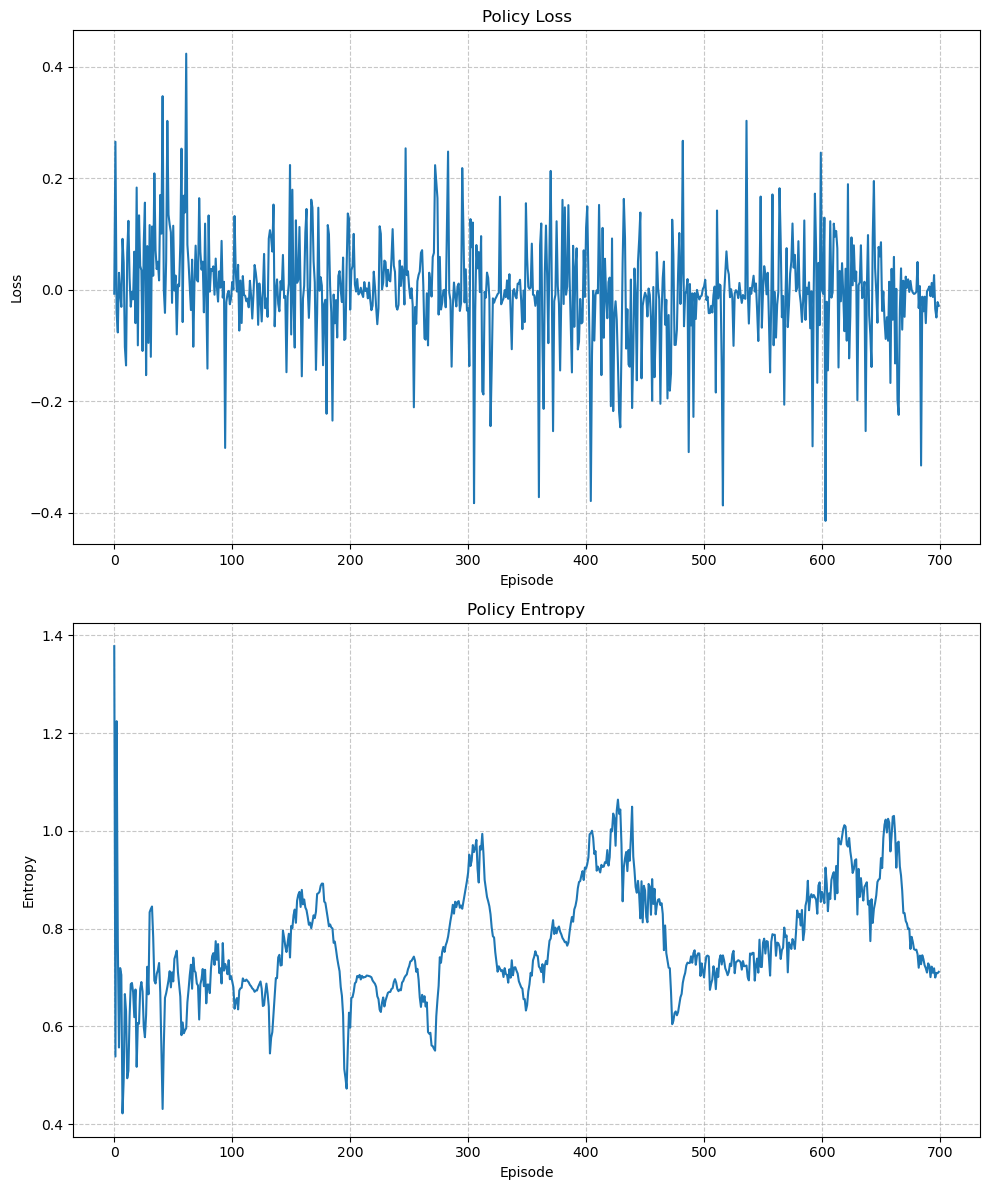

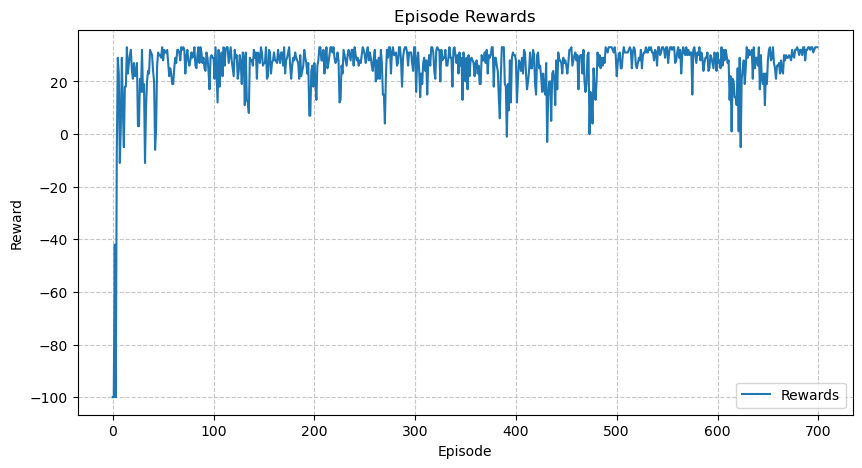

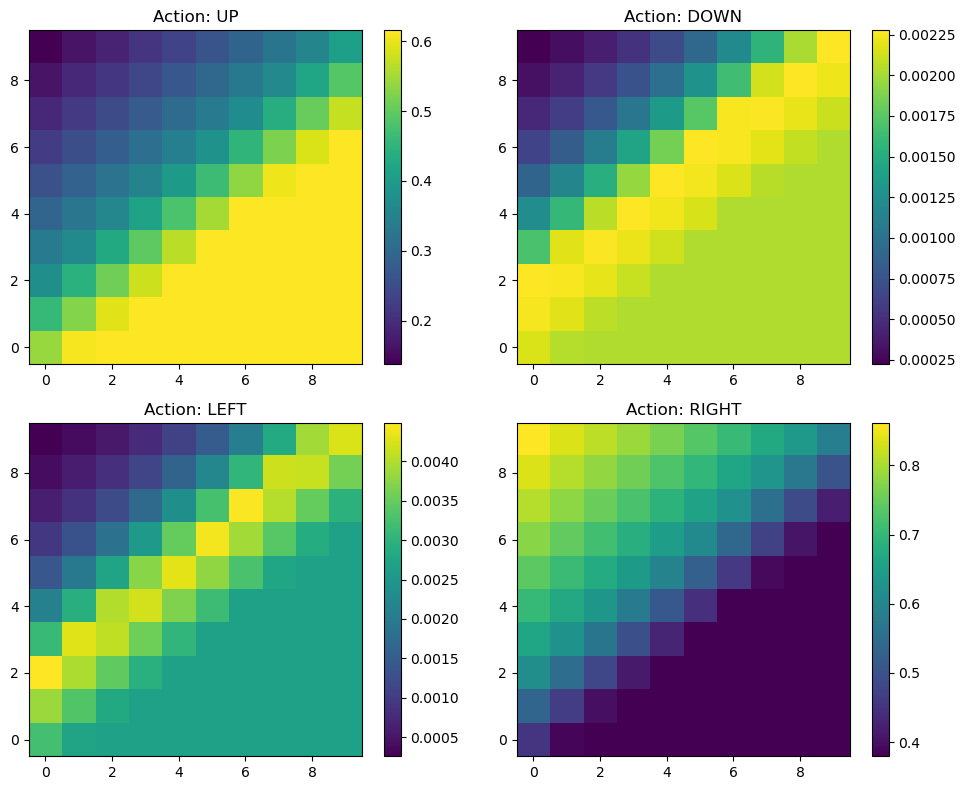

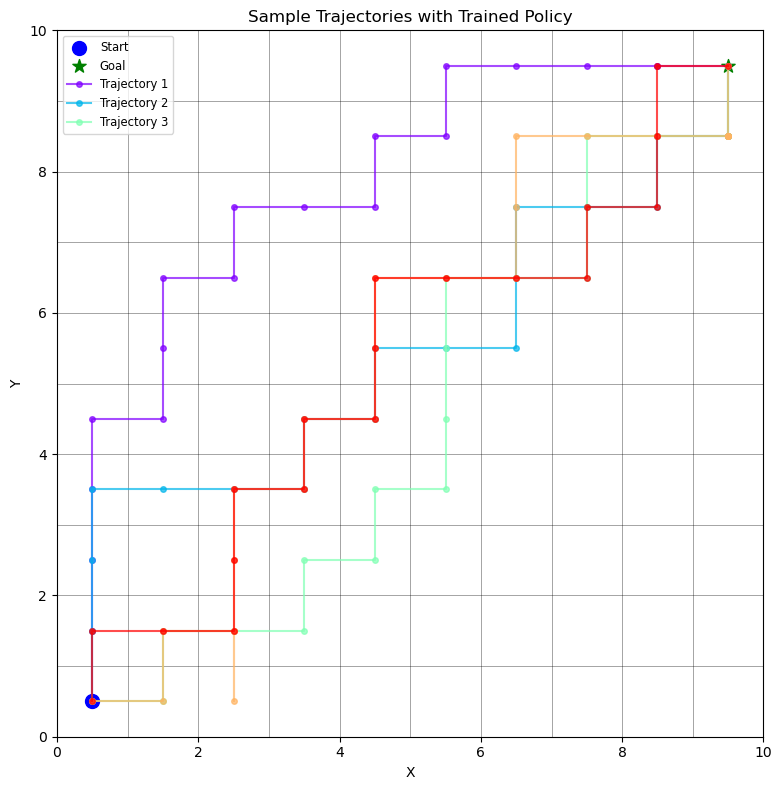

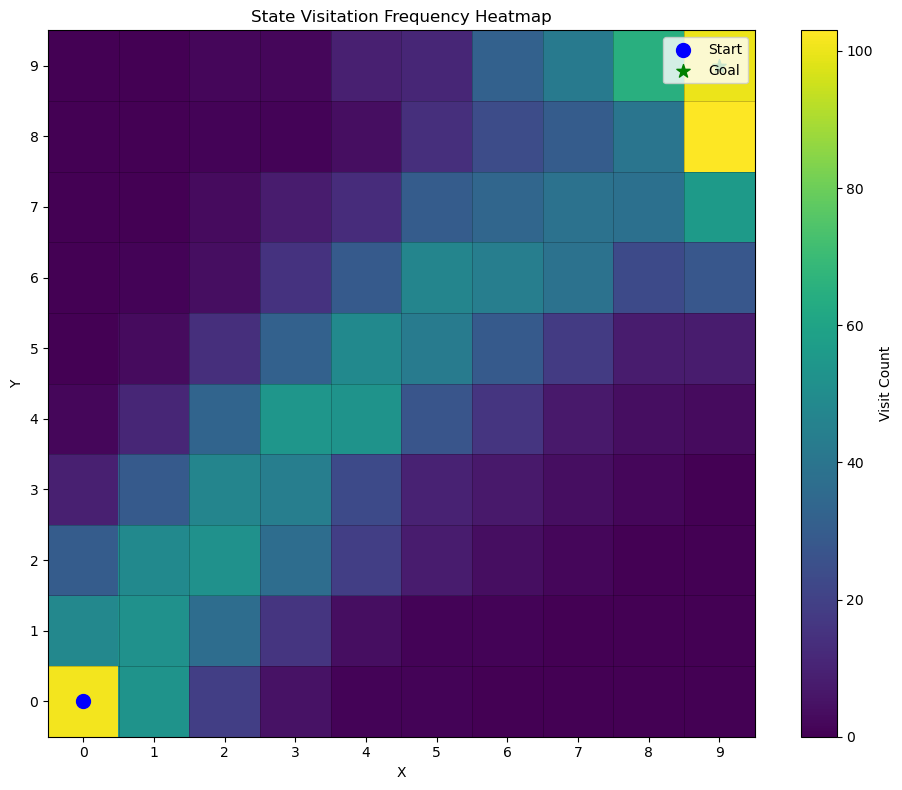

In [10]:
results_10x10 = load_results("grid_search_results_10x10.pickle")
df_sorted_10x10, df_sorted_avg_10x10 = analyze_results(results_10x10)
display(df_sorted_10x10[:5])
display(df_sorted_avg_10x10[:5])
visualize_best_agent(env_10x10, results_10x10, df_sorted_10x10)

In [ ]:
# Perform grid search for 14x14 grid
env_14x14 = GridWorld(grid_size=14, goal=(13, 13), stochastic=False, noise=0)
results_14x14 = perform_grid_search(env_14x14, hyperparams_14x14, num_episodes=700, max_steps=150, random_seed=random_seed)
save_results(results_14x14, "grid_search_results_14x14.pickle")

,Hyperparameters,Final Reward,Average Reward,Final Loss,Average Loss,Final Entropy,Average Entropy
4,"lr=0.01, temp=0.015, gamma=0.995, hidden_dim=128",24.0,12.895714,-0.010894,-0.055198,0.663710,0.801000
6,"lr=0.01, temp=0.05, gamma=0.993, hidden_dim=64",23.0,-19.441429,-0.149694,-0.134544,0.898756,1.052686
1,"lr=0.01, temp=0.015, gamma=0.993, hidden_dim=128",22.0,9.178571,-0.018406,-0.065629,0.704414,0.729917
3,"lr=0.01, temp=0.015, gamma=0.995, hidden_dim=64",17.0,-50.124286,-0.030223,-0.071969,0.744504,1.065548
7,"lr=0.01, temp=0.05, gamma=0.993, hidden_dim=128",17.0,5.747143,-0.105935,-0.118022,0.695686,0.961606


,Hyperparameters,Final Reward,Average Reward,Final Loss,Average Loss,Final Entropy,Average Entropy
4,"lr=0.01, temp=0.015, gamma=0.995, hidden_dim=128",24.0,12.895714,-0.010894,-0.055198,0.663710,0.801000
1,"lr=0.01, temp=0.015, gamma=0.993, hidden_dim=128",22.0,9.178571,-0.018406,-0.065629,0.704414,0.729917
10,"lr=0.01, temp=0.05, gamma=0.995, hidden_dim=128",16.0,7.615714,-0.191519,-0.138918,1.026710,0.964969
7,"lr=0.01, temp=0.05, gamma=0.993, hidden_dim=128",17.0,5.747143,-0.105935,-0.118022,0.695686,0.961606
6,"lr=0.01, temp=0.05, gamma=0.993, hidden_dim=64",23.0,-19.441429,-0.149694,-0.134544,0.898756,1.052686


Best agent: lr=0.01, temp=0.015, gamma=0.995, hidden_dim=128


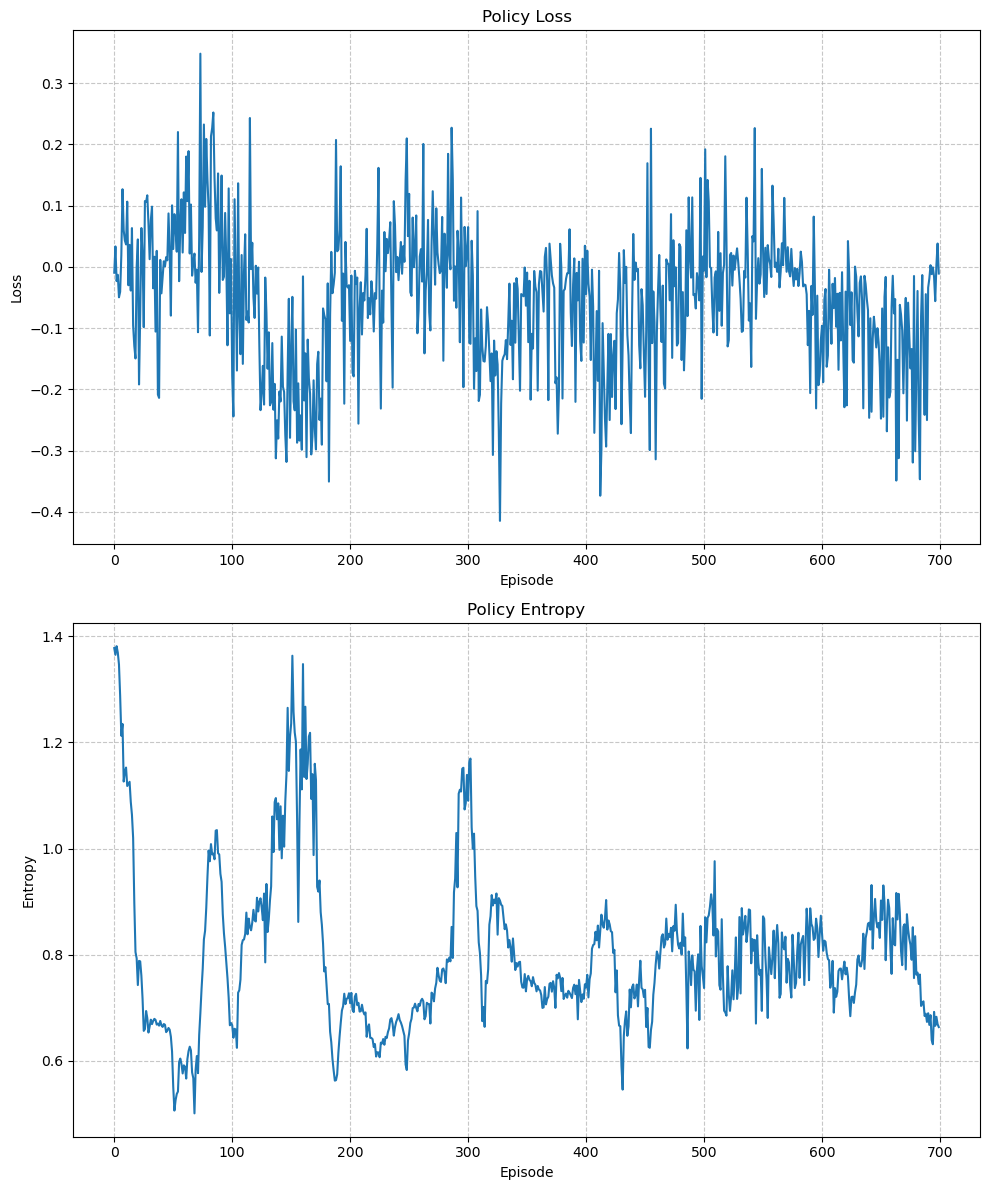

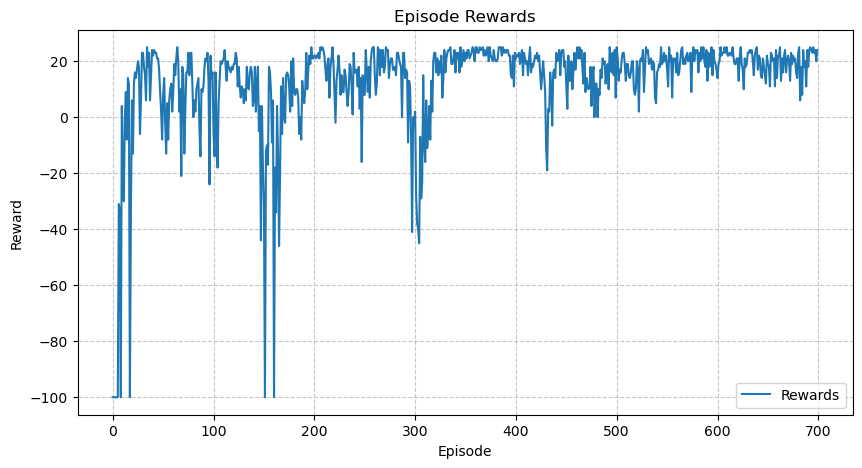

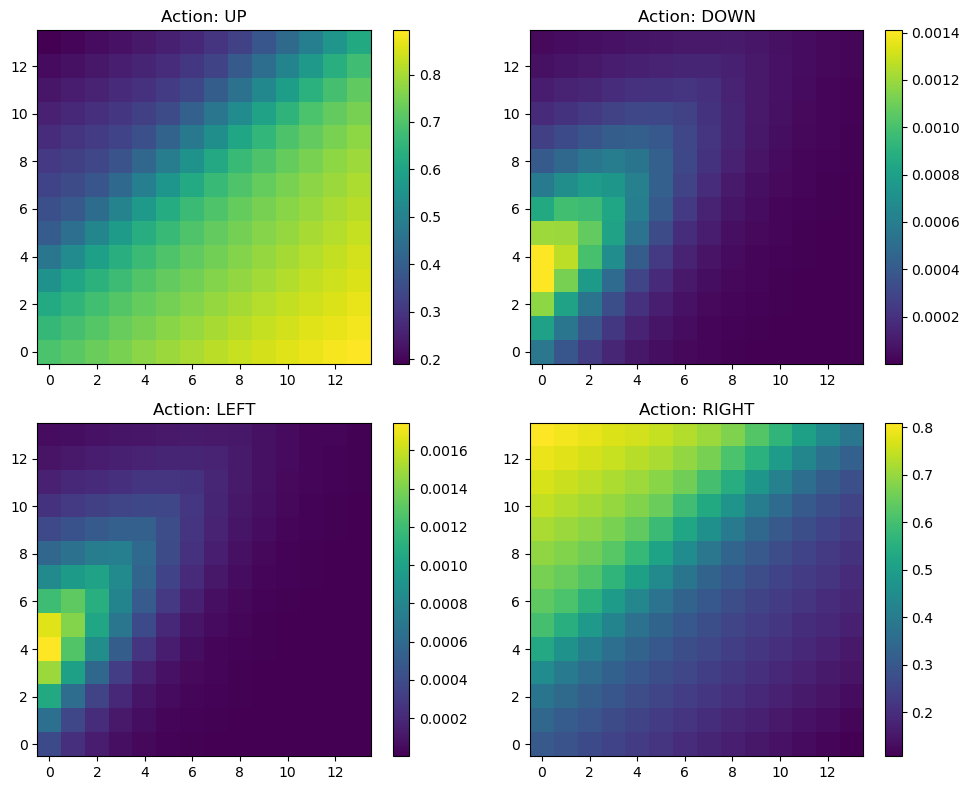

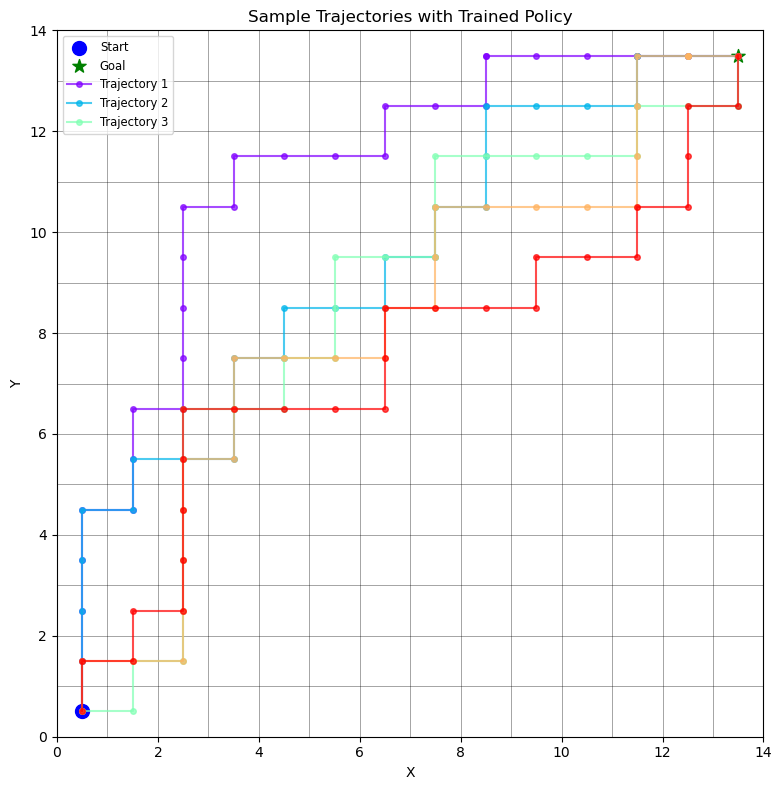

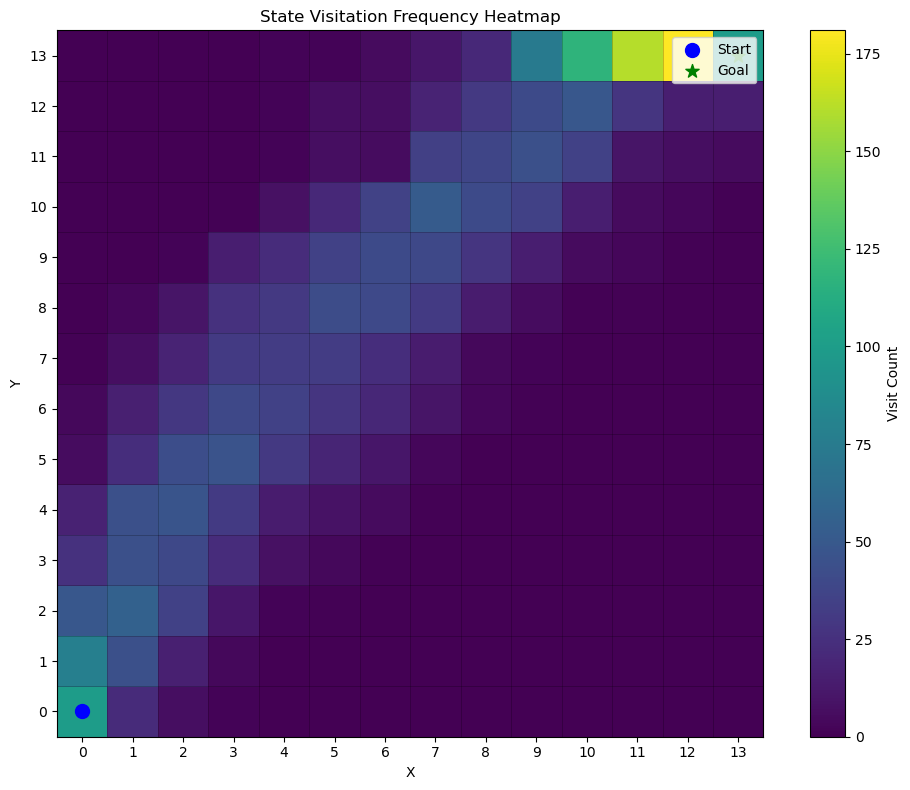

In [12]:
results_14x14 = load_results("grid_search_results_14x14.pickle")
df_sorted_14x14, df_sorted_avg_14x14 = analyze_results(results_14x14)
display(df_sorted_14x14[:5])
display(df_sorted_avg_14x14[:5])
visualize_best_agent(env_14x14, results_14x14, df_sorted_14x14)

In [ ]:
# Perform grid search for 5x5 grid
env_5x5 = GridWorld(grid_size=6, goal=(5, 5), stochastic=False, noise=0)
results_5x5 = perform_grid_search(env_5x5, hyperparams_5x5, num_episodes=500, max_steps=100, random_seed=random_seed)
save_results(results_5x5, "grid_search_results_5x5.pickle")

,Hyperparameters,Final Reward,Average Reward,Final Loss,Average Loss,Final Entropy,Average Entropy
0,"lr=0.01, temp=0.015, gamma=0.993, hidden_dim=64",41.0,25.052,-0.031349,-0.087421,0.761513,0.847894
21,"lr=0.05, temp=0.05, gamma=0.995, hidden_dim=64",41.0,31.312,-0.062774,-0.071122,0.683784,0.792837
7,"lr=0.01, temp=0.05, gamma=0.993, hidden_dim=128",41.0,37.710,-0.238773,-0.018726,0.523402,0.655222
9,"lr=0.01, temp=0.05, gamma=0.995, hidden_dim=64",41.0,26.766,-0.148337,-0.145166,1.034281,0.995579
11,"lr=0.01, temp=0.05, gamma=0.995, hidden_dim=192",41.0,36.014,-0.124177,-0.066266,0.567087,0.592077


,Hyperparameters,Final Reward,Average Reward,Final Loss,Average Loss,Final Entropy,Average Entropy
7,"lr=0.01, temp=0.05, gamma=0.993, hidden_dim=128",41.0,37.710,-0.238773,-0.018726,0.523402,0.655222
1,"lr=0.01, temp=0.015, gamma=0.993, hidden_dim=128",41.0,37.606,-0.011807,0.029207,0.583310,0.601872
10,"lr=0.01, temp=0.05, gamma=0.995, hidden_dim=128",39.0,37.524,0.501625,-0.013720,0.474600,0.673641
11,"lr=0.01, temp=0.05, gamma=0.995, hidden_dim=192",41.0,36.014,-0.124177,-0.066266,0.567087,0.592077
8,"lr=0.01, temp=0.05, gamma=0.993, hidden_dim=192",39.0,34.318,-0.093902,-0.168085,0.605949,0.832154


Best agent: lr=0.01, temp=0.015, gamma=0.993, hidden_dim=64


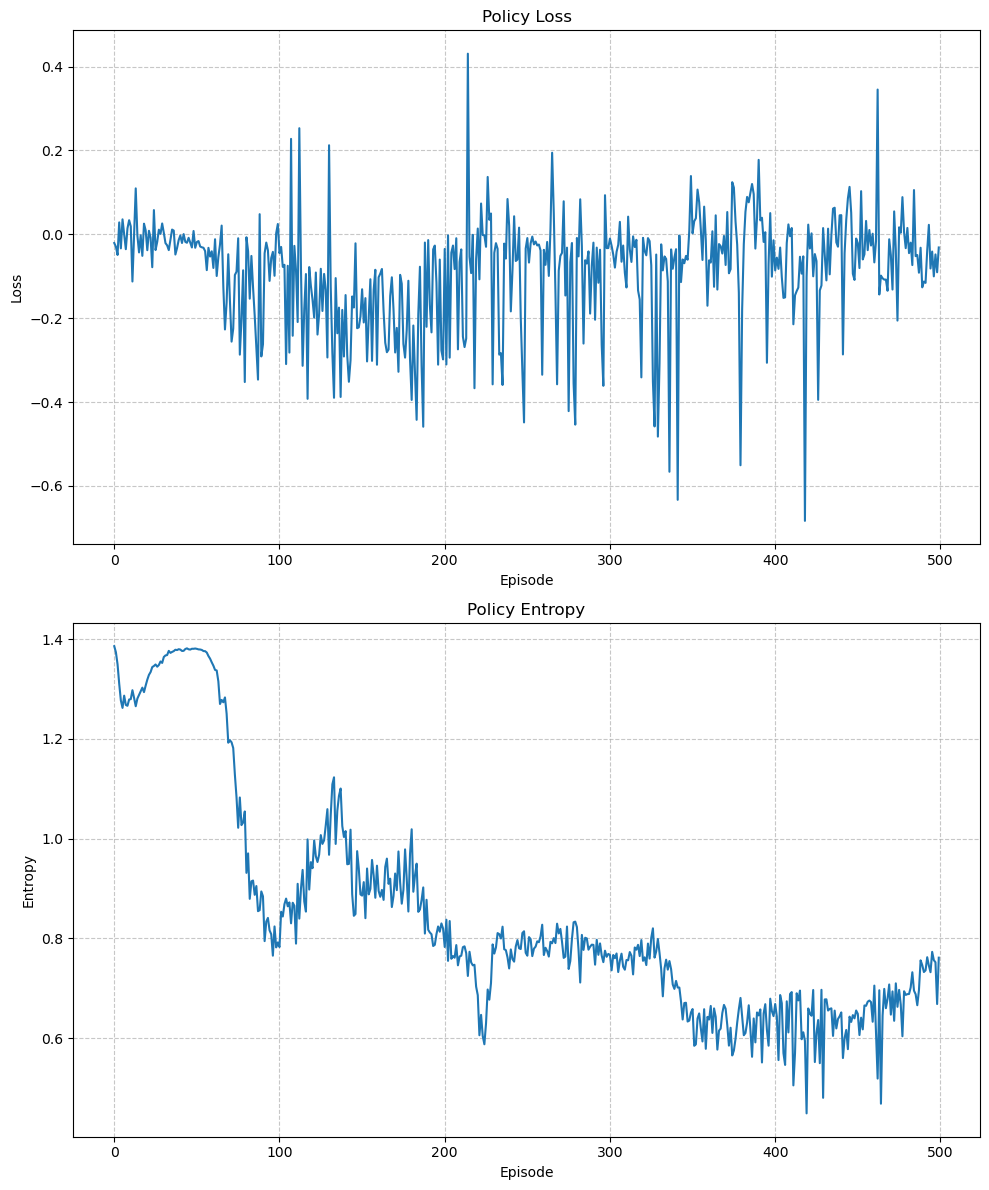

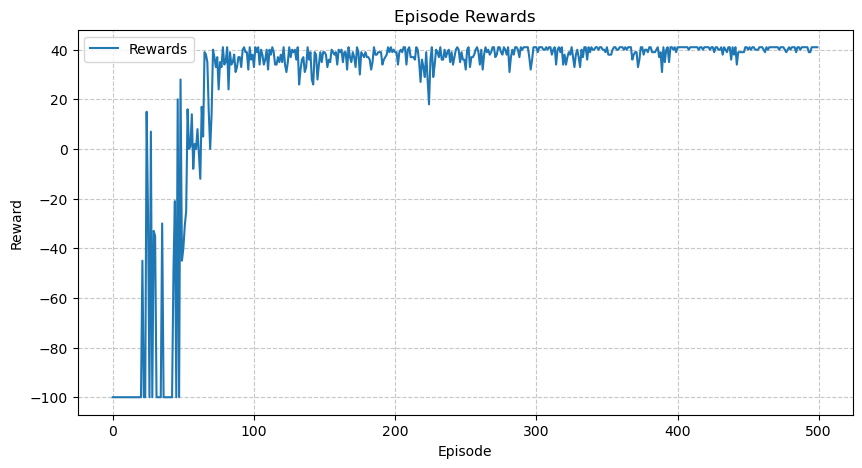

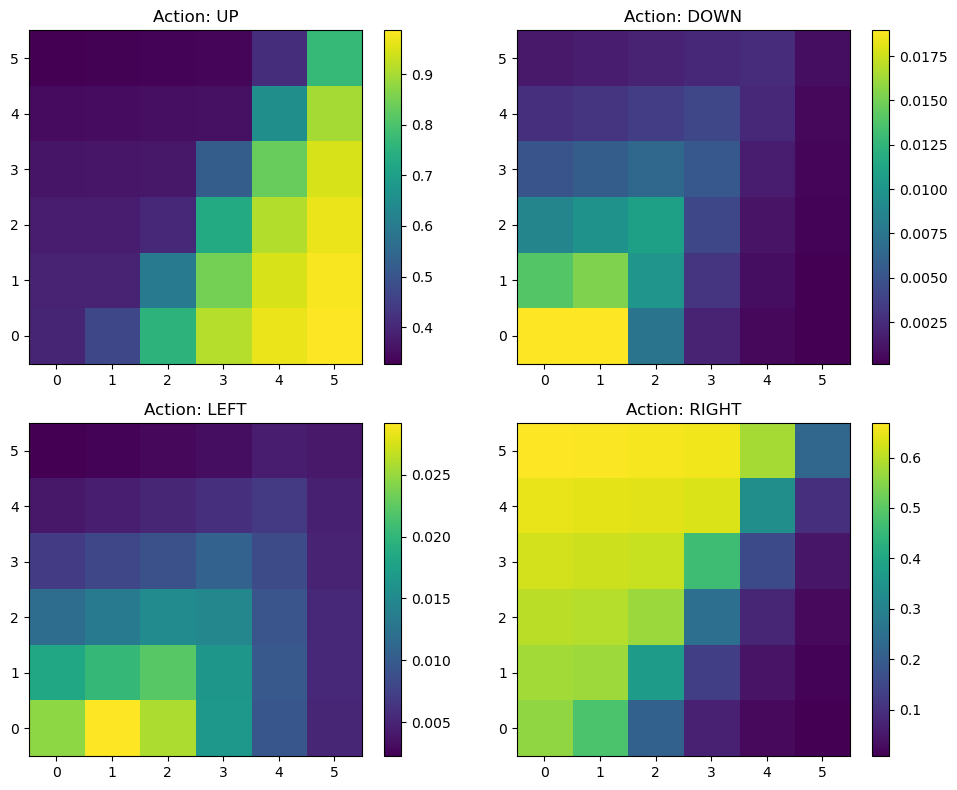

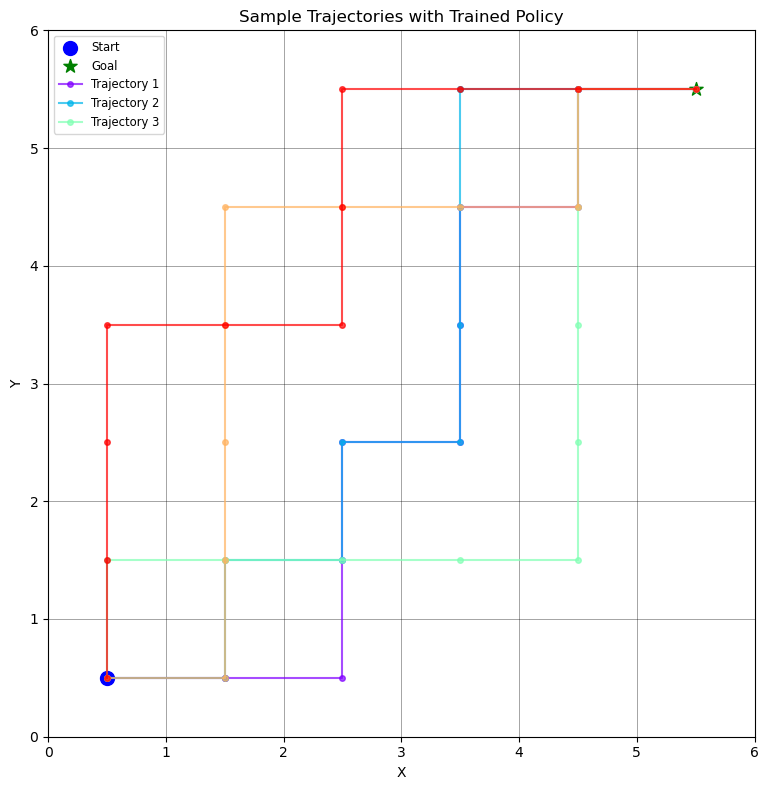

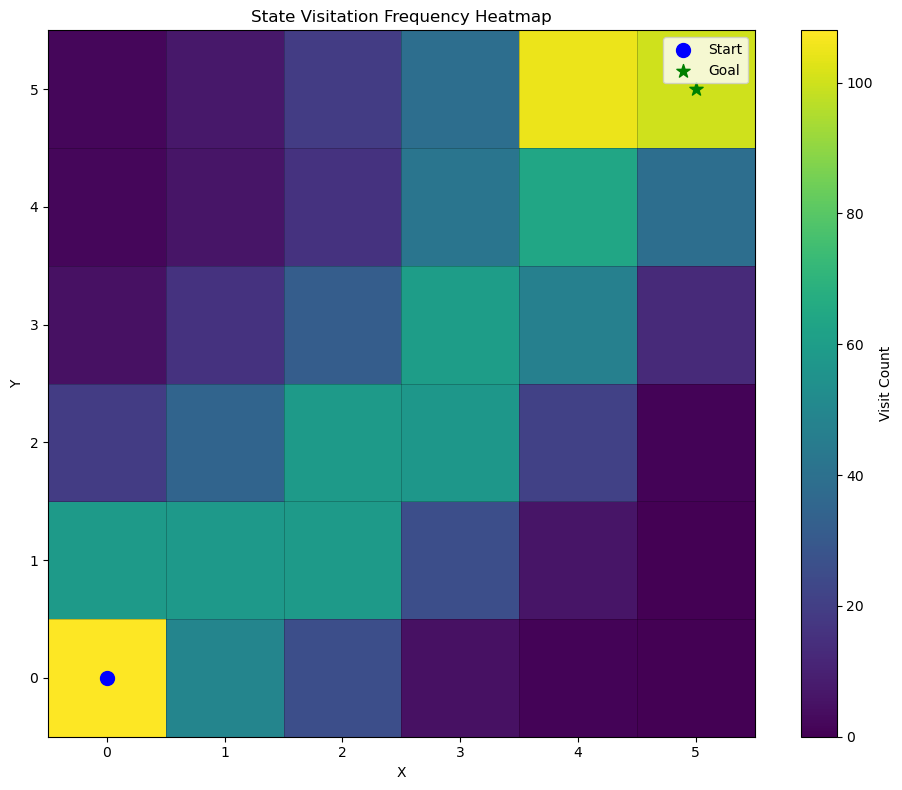

In [14]:
results_5x5 = load_results("grid_search_results_5x5.pickle")
df_sorted_5x5, df_sorted_avg_5x5 = analyze_results(results_5x5)
display(df_sorted_5x5[:5])
display(df_sorted_avg_5x5[:5])
visualize_best_agent(env_5x5, results_5x5, df_sorted_5x5)